<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_CurvaROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

df = pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/modifiedIris2Classes.csv')
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


**Creen un clasificador de regresión logística**

In [42]:
# Split into X and y
X = df.drop(columns = 'target')
y = df['target']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Make an instance of the model
logreg = LogisticRegression(C = .001)
# Scaling logistic regression
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.001))])

**Calculo de AUC y visualizacion del ROC**

Training AUC: 0.9565527065527065
Testing AUC: 0.987012987012987


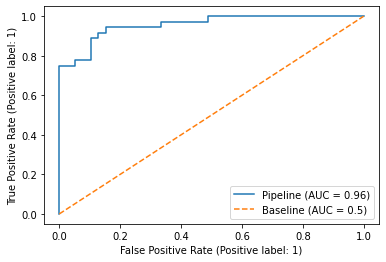

In [43]:
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')

# Visualize the ROC curve
RocCurveDisplay.from_estimator(logreg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();



**Instancia del scaler**

In [29]:
#Instancia del Scaler
scaler = StandardScaler()


# RandomForestClassifier

**Crea instancia del modelo y Revision de hiperparametros**

In [30]:
rf = RandomForestClassifier(random_state = 42)
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [31]:
#instancia y entrenamiento del pipeline que contiene el scaler y knn
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [32]:
#predicciones
predictions = rf_pipe.predict(X_test)
print('prediccion',predictions)
# Evaluacion en el conjunto de pruebas
# calculen la exactitud de la clasificación
acc_score = rf_pipe.score(X_test, y_test)
print('accuracy',acc_score)

prediccion [1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1 3
 3 2 3 1 2 2 2 3]
accuracy 1.0


# KNN

In [33]:
# Instancia del modelo KNN (el parametro n_neighbors es modificable)
knn = KNeighborsClassifier(n_neighbors=30)
# Revision de hiperparametros
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

In [34]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=30))])

In [35]:
#predicciones
predictions = knn_pipe.predict(X_test)
print('prediccion',predictions)
# Evaluacion en el conjunto de pruebas
# calculen la exactitud de la clasificación
acc_score = knn_pipe.score(X_test, y_test)
print('accuracy',acc_score)

prediccion [1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 1 2 1 1 2 3 1 1 1 3
 3 1 3 1 2 2 2 3]
accuracy 0.9555555555555556


# Regresion Logistica

In [36]:
X = df.drop(columns=['Class label'])
y = df['Class label']
 
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))



1.0
0.9777777777777777


**Afinacion L1**

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

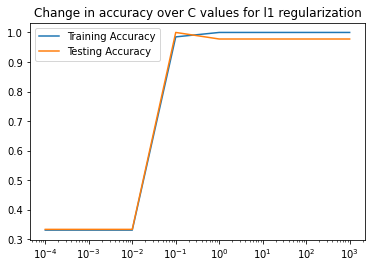

In [37]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

**Según este gráfico, obtenemos la mejor exactitud en el conjunto de prueba cuando C=0,1 (10°)**

**Afinacion L2**

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9555555555555556,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

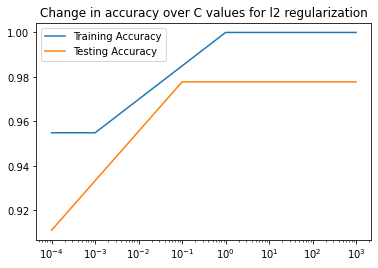

In [38]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

**Con la regularización L2 conseguimos nuestra mejor puntuación en C=0,1, y las puntuaciones de prueba se mantienen a medida que C aumenta.**

El mapa de calor muestra las características altamente correlacionadas como cuadros muy claros u oscuros en las intersecciones de las filas y columnas de esas características. Observamos numerosos cuadros claros y oscuros. Como sabemos, la regularización L2 es útil para modelar conjuntos de datos con multicolinealidad o características altamente correlacionadas

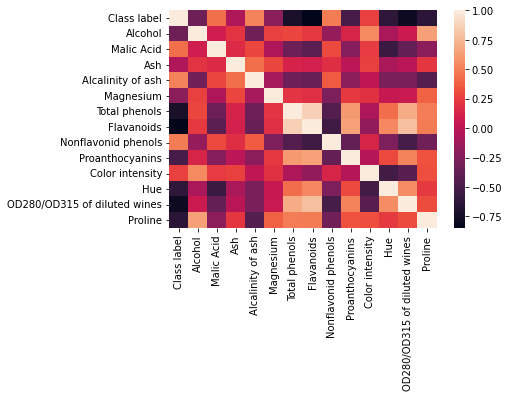

In [39]:
lista=list(df.columns)
idx = len(df) 
cols = df.columns
corr = df.corr() 
sns.heatmap(corr, annot = False)

R1 el modelo que mejor funciona es segun su accuracy el de random forest
R2 se afinaron ambos parametros y el modelo que mas gusto es el de random forest